# Check out open-source beer data

https://openbeerdb.com/


In [1]:
import requests
import glob
import os
import zipfile

In [2]:
#standalone download/upload in jupyter notebook of csv-files

print('Start downloading beer data file...')
url = 'https://openbeerdb.com/files/openbeerdb_csv.zip'
pathZip = 'C:/Users/WLi/OneDrive - Trivadis AG/Aus- Weiterbildung/StreamProcessing_Python_Kafka/openbeerdb_csv.zip'

file = requests.get(url)

open(pathZip, 'wb').write(file.content)

print('Download successful...')

#extract the zip in your directory

extract_path = 'C:/Users/WLi/OneDrive - Trivadis AG/Aus- Weiterbildung/StreamProcessing_Python_Kafka'
with zipfile.ZipFile(pathZip, 'r') as zipRef:
    zipRef.extractall(extract_path)
print('ZipFile extracted successfull...')

Start downloading beer data file...
Download successful...
ZipFile extracted successfull...


# Reading data from csv-files

In [3]:
import pandas as pd

In [4]:
data1 = pd.read_csv("beers.csv", header=0, usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8])
data1.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,1,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,brewery_id,name,cat_id,style_id,abv,ibu,srm,upc
0,1,812,Hocus Pocus,11,116,4.5,0,0,0
1,2,264,Grimbergen Blonde,-1,-1,6.7,0,0,0
2,3,779,Widdershins Barleywine,-1,-1,9.1,0,0,0
3,4,287,Lucifer,-1,-1,8.5,0,0,0
4,5,1056,Bitter,-1,-1,4,0,0,0


In [5]:
data2 = pd.read_csv("breweries.csv", header=0)
data2.head()

,id,name,address1,address2,city,state,code,country,phone,website,filepath,descript,last_mod
0,1,(512) Brewing Company,"407 Radam, F200",NaN,Austin,Texas,78745,United States,512.707.2337,http://512brewing.com/,NaN,(512) Brewing Company is a microbrewery locate...,2010-07-22 20:00:20
1,2,21st Amendment Brewery Cafe,563 Second Street,NaN,San Francisco,California,94107,United States,1-415-369-0900,http://www.21st-amendment.com/,NaN,The 21st Amendment Brewery offers a variety of...,2010-10-24 13:54:07
2,3,3 Fonteinen Brouwerij Ambachtelijke Geuzestekerij,Hoogstraat 2A,NaN,Beersel,Vlaams Brabant,NaN,Belgium,32-02-/-306-71-03,http://www.3fonteinen.be/index.htm,NaN,NaN,2010-07-22 20:00:20
3,4,Aass Brewery,Ole Steensgt. 10 Postboks 1530,NaN,Drammen,NaN,NaN,Norway,47-32-26-60-00,http://www.aass.no,NaN,Aass Brewery was established in 1834 and is th...,2010-07-22 20:00:20
4,5,Abbaye de Leffe,Dinant,NaN,Dinant,Namur,NaN,Belgium,NaN,NaN,NaN,NaN,2010-07-22 20:00:20


In [6]:
data3 = pd.read_csv("breweries_geocode.csv", header=0)
data3.head()

,id,brewery_id,latitude,longitude,accuracy
0,1,1,30.2234,-97.7697,ROOFTOP
1,2,2,37.7825,-122.3930,ROOFTOP
2,3,3,50.7668,4.3081,RANGE_INTERPOLATED
3,4,4,59.7451,10.2135,APPROXIMATE
4,5,5,50.2606,4.9122,APPROXIMATE


In [7]:
data4 = pd.read_csv("categories.csv", header=0)
data4.head()

,id,cat_name,last_mod
0,1,British Ale,2010-10-24 13:50:10
1,2,Irish Ale,2010-06-08 00:00:00
2,3,North American Ale,2010-06-08 00:00:00
3,4,German Ale,2010-06-08 00:00:00
4,5,Belgian and French Ale,2010-06-08 00:00:00


In [8]:
data5 = pd.read_csv("styles.csv", header=0)
data5.head()

,id,cat_id,style_name,last_mod
0,1,1,Classic English-Style Pale Ale,2010-10-24 13:53:31
1,2,1,English-Style India Pale Ale,2010-06-15 19:14:38
2,3,1,Ordinary Bitter,2010-06-15 19:14:54
3,4,1,Special Bitter or Best Bitter,2010-06-15 19:15:02
4,5,1,Extra Special Bitter,2010-06-15 19:15:09


# Use ".describe()" to get a statiscial overview

In [9]:
print(data1.describe())
print(data3.describe())
#data4.describe()
#data5.describe()

          id brewery_id      name  cat_id  style_id     abv   ibu   srm   upc
count   5845       5837      5837    5832      5829  5825.0  5822  5822  5822
unique  5845       1650      4982      28       129   266.0    20    15     5
top     2817       1072  Pale Ale       3        -1     0.0     0     0     0
freq       1         47        48    1248      1046  2648.0  4803  4809  4816
                id   brewery_id     latitude    longitude
count  1304.000000  1304.000000  1304.000000  1304.000000
mean    657.648006   699.611196    41.473073   -63.765908
std     379.382053   400.565205    12.959051    58.324611
min       1.000000     1.000000   -45.872000  -157.858000
25%     328.750000   353.500000    38.973475  -105.139500
50%     658.500000   703.500000    42.504450   -83.819250
75%     985.250000  1046.250000    48.149975    -1.260825
max    1315.000000  1394.000000    64.958300   176.854000


# Join the datasets to get one dataframe

In [10]:
#check how the the columns are assigned
data1['brewery_id']

0        812
1        264
2        779
3        287
4       1056
        ... 
5856      10
5857      10
5858      10
5859    1422
5860    1423
Name: brewery_id, Length: 5861, dtype: object

In [11]:
#pick an example from dataset 1
data1.loc[0,:]

id                      1
brewery_id            812
name          Hocus Pocus
cat_id                 11
style_id              116
abv                   4.5
ibu                     0
srm                     0
upc                     0
Name: 0, dtype: object

In [12]:
#pick an example from dataset 2
data2.loc[806,:]

id                                                        812
name                                                Magic Hat
address1                                  5 Bartlett Bay Road
address2                                                  NaN
city                                         South Burlington
state                                                 Vermont
code                                                     5403
country                                         United States
phone                                          1-802-658-2739
website                              http://www.magichat.net/
filepath                                                  NaN
descript    Burlington microbrewers of Humble Patience, Fa...
last_mod                                  2010-07-22 20:00:20
Name: 806, dtype: object

In [13]:
join1 = data1.set_index('brewery_id').join(data2.set_index('id'), lsuffix='_caller', rsuffix='_other')
join1 = join1.iloc[1:] #drops the first row, because we also matched the header
join1.head()

,id,name_caller,cat_id,style_id,abv,ibu,srm,upc,name_other,address1,address2,city,state,code,country,phone,website,filepath,descript,last_mod
1,5735,(512) Wit,5,67,5.2,0,0,0,(512) Brewing Company,"407 Radam, F200",NaN,Austin,Texas,78745,United States,512.707.2337,http://512brewing.com/,NaN,(512) Brewing Company is a microbrewery locate...,2010-07-22 20:00:20
1,5736,(512) Pale,3,26,5.8,0,0,0,(512) Brewing Company,"407 Radam, F200",NaN,Austin,Texas,78745,United States,512.707.2337,http://512brewing.com/,NaN,(512) Brewing Company is a microbrewery locate...,2010-07-22 20:00:20
1,5737,(512) IPA,3,31,7,0,0,0,(512) Brewing Company,"407 Radam, F200",NaN,Austin,Texas,78745,United States,512.707.2337,http://512brewing.com/,NaN,(512) Brewing Company is a microbrewery locate...,2010-07-22 20:00:20
1,5738,(512) Pecan Porter,2,25,6.8,0,0,0,(512) Brewing Company,"407 Radam, F200",NaN,Austin,Texas,78745,United States,512.707.2337,http://512brewing.com/,NaN,(512) Brewing Company is a microbrewery locate...,2010-07-22 20:00:20
1,5739,(512) ALT,4,57,6,0,0,0,(512) Brewing Company,"407 Radam, F200",NaN,Austin,Texas,78745,United States,512.707.2337,http://512brewing.com/,NaN,(512) Brewing Company is a microbrewery locate...,2010-07-22 20:00:20


In [14]:
#check if join was successful and as you wanted with the example above
#different beer-ids can have the same brewery-id
join1.loc[812,:]

,id,name_caller,cat_id,style_id,abv,ibu,srm,upc,name_other,address1,address2,city,state,code,country,phone,website,filepath,descript,last_mod
812,1,Hocus Pocus,11,116,4.5,0,0,0,Magic Hat,5 Bartlett Bay Road,NaN,South Burlington,Vermont,5403,United States,1-802-658-2739,http://www.magichat.net/,NaN,"Burlington microbrewers of Humble Patience, Fa...",2010-07-22 20:00:20
812,5178,Odd Notion Winter 08,-1,-1,7.5,0,0,0,Magic Hat,5 Bartlett Bay Road,NaN,South Burlington,Vermont,5403,United States,1-802-658-2739,http://www.magichat.net/,NaN,"Burlington microbrewers of Humble Patience, Fa...",2010-07-22 20:00:20
812,5453,Wacko,11,121,4.5,0,0,0,Magic Hat,5 Bartlett Bay Road,NaN,South Burlington,Vermont,5403,United States,1-802-658-2739,http://www.magichat.net/,NaN,"Burlington microbrewers of Humble Patience, Fa...",2010-07-22 20:00:20
812,5685,Howl,8,95,4.6,0,0,0,Magic Hat,5 Bartlett Bay Road,NaN,South Burlington,Vermont,5403,United States,1-802-658-2739,http://www.magichat.net/,NaN,"Burlington microbrewers of Humble Patience, Fa...",2010-07-22 20:00:20
812,5763,Scumptious Spring Lager (Vinyl),-1,-1,0,0,0,0,Magic Hat,5 Bartlett Bay Road,NaN,South Burlington,Vermont,5403,United States,1-802-658-2739,http://www.magichat.net/,NaN,"Burlington microbrewers of Humble Patience, Fa...",2010-07-22 20:00:20


In [15]:
# beer with id 812
query = 812
join1[join1['id'] == query]

,id,name_caller,cat_id,style_id,abv,ibu,srm,upc,name_other,address1,address2,city,state,code,country,phone,website,filepath,descript,last_mod
709,812,Porter,2,25,0,0,0,0,Jaipur Restaurant and Brewpub,10922 Elm Street,NaN,Omaha,Nebraska,68144,United States,1-402-392-7331,NaN,NaN,NaN,2010-07-22 20:00:20


In [16]:
data2.loc[0,:]

id                                                          1
name                                    (512) Brewing Company
address1                                      407 Radam, F200
address2                                                  NaN
city                                                   Austin
state                                                   Texas
code                                                    78745
country                                         United States
phone                                            512.707.2337
website                                http://512brewing.com/
filepath                                                  NaN
descript    (512) Brewing Company is a microbrewery locate...
last_mod                                  2010-07-22 20:00:20
Name: 0, dtype: object

In [17]:
data3.loc[0,:]

id                  1
brewery_id          1
latitude      30.2234
longitude    -97.7697
accuracy      ROOFTOP
Name: 0, dtype: object

In [18]:
# join brewery datasets (dataset 2 + 3)

In [19]:
join2 = data2.set_index('id').join(data3.set_index('brewery_id'), lsuffix='_brewery', rsuffix='_brewery2')
join2 = join2.iloc[1:] #drops the first row, because we also matched the header
join2.head()

,name,address1,address2,city,state,code,country,phone,website,filepath,descript,last_mod,id,latitude,longitude,accuracy
2,21st Amendment Brewery Cafe,563 Second Street,NaN,San Francisco,California,94107,United States,1-415-369-0900,http://www.21st-amendment.com/,NaN,The 21st Amendment Brewery offers a variety of...,2010-10-24 13:54:07,2.0,37.7825,-122.3930,ROOFTOP
3,3 Fonteinen Brouwerij Ambachtelijke Geuzestekerij,Hoogstraat 2A,NaN,Beersel,Vlaams Brabant,NaN,Belgium,32-02-/-306-71-03,http://www.3fonteinen.be/index.htm,NaN,NaN,2010-07-22 20:00:20,3.0,50.7668,4.3081,RANGE_INTERPOLATED
4,Aass Brewery,Ole Steensgt. 10 Postboks 1530,NaN,Drammen,NaN,NaN,Norway,47-32-26-60-00,http://www.aass.no,NaN,Aass Brewery was established in 1834 and is th...,2010-07-22 20:00:20,4.0,59.7451,10.2135,APPROXIMATE
5,Abbaye de Leffe,Dinant,NaN,Dinant,Namur,NaN,Belgium,NaN,NaN,NaN,NaN,2010-07-22 20:00:20,5.0,50.2606,4.9122,APPROXIMATE
6,Abbaye de Maredsous,"Rue de Maredsous, 11",NaN,Dene,Namur,NaN,Belgium,32-(0)82-69-82-11,http://www.maredsous10.be/,NaN,NaN,2010-07-22 20:00:20,6.0,50.3093,4.7646,GEOMETRIC_CENTER


In [20]:
#check magic hat
join2.loc[812,:]

name                                                 Magic Hat
address1                                   5 Bartlett Bay Road
address2                                                   NaN
city                                          South Burlington
state                                                  Vermont
code                                                      5403
country                                          United States
phone                                           1-802-658-2739
website                               http://www.magichat.net/
filepath                                                   NaN
descript     Burlington microbrewers of Humble Patience, Fa...
last_mod                                   2010-07-22 20:00:20
id                                                         763
latitude                                               44.4284
longitude                                             -73.2131
accuracy                                               

In [21]:
# join beer datasets category + styles datasets to dataset 1

In [22]:
data4['id'].tolist()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [23]:
data4['cat_name'].tolist()

['British Ale',
 'Irish Ale',
 'North American Ale',
 'German Ale',
 'Belgian and French Ale',
 'International Ale',
 'German Lager',
 'North American Lager',
 'Other Lager',
 'International Lager',
 'Other Style']

In [24]:
data1.head()

,id,brewery_id,name,cat_id,style_id,abv,ibu,srm,upc
0,1,812,Hocus Pocus,11,116,4.5,0,0,0
1,2,264,Grimbergen Blonde,-1,-1,6.7,0,0,0
2,3,779,Widdershins Barleywine,-1,-1,9.1,0,0,0
3,4,287,Lucifer,-1,-1,8.5,0,0,0
4,5,1056,Bitter,-1,-1,4,0,0,0


In [25]:
data4.head()

,id,cat_name,last_mod
0,1,British Ale,2010-10-24 13:50:10
1,2,Irish Ale,2010-06-08 00:00:00
2,3,North American Ale,2010-06-08 00:00:00
3,4,German Ale,2010-06-08 00:00:00
4,5,Belgian and French Ale,2010-06-08 00:00:00


In [26]:
join3 = data1.set_index('cat_id').join(data4, lsuffix='_beer', rsuffix='_cat')
join3.head()

,id_beer,brewery_id,name,style_id,abv,ibu,srm,upc,id_cat,cat_name,last_mod
-1,2,264,Grimbergen Blonde,-1,6.7,0,0,0,NaN,NaN,NaN
-1,3,779,Widdershins Barleywine,-1,9.1,0,0,0,NaN,NaN,NaN
-1,4,287,Lucifer,-1,8.5,0,0,0,NaN,NaN,NaN
-1,5,1056,Bitter,-1,4,0,0,0,NaN,NaN,NaN
-1,7,1099,Winter Welcome 2007-2008,-1,6,0,0,0,NaN,NaN,NaN


In [27]:
data5.head()

,id,cat_id,style_name,last_mod
0,1,1,Classic English-Style Pale Ale,2010-10-24 13:53:31
1,2,1,English-Style India Pale Ale,2010-06-15 19:14:38
2,3,1,Ordinary Bitter,2010-06-15 19:14:54
3,4,1,Special Bitter or Best Bitter,2010-06-15 19:15:02
4,5,1,Extra Special Bitter,2010-06-15 19:15:09


In [28]:
join4 = data1.set_index('style_id').join(data5, lsuffix='_beer', rsuffix='_style')
join4.head()

,id_beer,brewery_id,name,cat_id_beer,abv,ibu,srm,upc,id_style,cat_id_style,style_name,last_mod
-1,2,264,Grimbergen Blonde,-1,6.7,0,0,0,NaN,NaN,NaN,NaN
-1,3,779,Widdershins Barleywine,-1,9.1,0,0,0,NaN,NaN,NaN,NaN
-1,4,287,Lucifer,-1,8.5,0,0,0,NaN,NaN,NaN,NaN
-1,5,1056,Bitter,-1,4,0,0,0,NaN,NaN,NaN,NaN
-1,7,1099,Winter Welcome 2007-2008,-1,6,0,0,0,NaN,NaN,NaN,NaN


In [29]:
#check for category 1 "Irish Ale"
join3.loc[1,:]

,id_beer,brewery_id,name,style_id,abv,ibu,srm,upc,id_cat,cat_name,last_mod
1.0,6,1385,Winter Warmer,13,5.2,0,0,0,2.0,Irish Ale,2010-06-08 00:00:00
1.0,20,483,Cow Palace Scotch Ale 1998,15,8.7,0,0,0,2.0,Irish Ale,2010-06-08 00:00:00
1.0,26,1220,Winter Ale,13,5.9,0,0,0,2.0,Irish Ale,2010-06-08 00:00:00
1.0,101,1185,Winter Ale,13,6.3,0,0,0,2.0,Irish Ale,2010-06-08 00:00:00
1.0,102,1260,Pride & Joy Mild Ale,10,0,0,0,0,2.0,Irish Ale,2010-06-08 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...
1.0,5889,1412,IPA,2,3.5,0,0,0,2.0,Irish Ale,2010-06-08 00:00:00
1.0,5890,1412,Dark Mild,11,3.2,0,0,0,2.0,Irish Ale,2010-06-08 00:00:00
1.0,5891,1412,2008 Culture Beer,3,5,0,0,0,2.0,Irish Ale,2010-06-08 00:00:00
1.0,5892,1413,Iron Rail IPA,2,7.2,0,0,0,2.0,Irish Ale,2010-06-08 00:00:00


In [30]:
#check for style 1 "Classic English-Style Pale Ale"
join4.loc[1,:]

,id_beer,brewery_id,name,cat_id_beer,abv,ibu,srm,upc,id_style,cat_id_style,style_name,last_mod
1,879,935,5 Barrel Pale Ale,1,5.3,0,0,0,2.0,1.0,English-Style India Pale Ale,2010-06-15 19:14:38
1,919,1185,St Peter's Organic Ale,1,4.5,0,0,0,2.0,1.0,English-Style India Pale Ale,2010-06-15 19:14:38
1,946,823,Brilliant Barstool,1,5.1,0,0,0,2.0,1.0,English-Style India Pale Ale,2010-06-15 19:14:38
1,1175,869,West Bank Pub Ale,1,4.6,0,0,0,2.0,1.0,English-Style India Pale Ale,2010-06-15 19:14:38
1.0,3121,890,Old Speckled Hen,1,5.2,0,0,0,2.0,1.0,English-Style India Pale Ale,2010-06-15 19:14:38
1.0,5200,546,Foster's Premium Ale,1,5.5,0,0,0,2.0,1.0,English-Style India Pale Ale,2010-06-15 19:14:38
1.0,5421,722,Martin's Pale Ale,1,5.8,0,0,0,2.0,1.0,English-Style India Pale Ale,2010-06-15 19:14:38
1.0,5548,911,Speight's Gold Medal Ale,1,4,0,0,0,2.0,1.0,English-Style India Pale Ale,2010-06-15 19:14:38
1.0,5631,1155,Urban Wilderness English Pale,1,5.1,0,0,0,2.0,1.0,English-Style India Pale Ale,2010-06-15 19:14:38
1.0,5811,1213,Legbiter Ale,1,4.7,0,0,0,2.0,1.0,English-Style India Pale Ale,2010-06-15 19:14:38


In [31]:
#join dataset2/3 to dataset1 to get one dataset with the most information

In [32]:
join_all = data1.set_index('brewery_id').join(join2, lsuffix='_beer', rsuffix='_brewery')
join_all = join_all.iloc[1:] #drops the first row, because we also matched the header
join_all.head()

,id_beer,name_beer,cat_id,style_id,abv,ibu,srm,upc,name_brewery,address1,...,country,phone,website,filepath,descript,last_mod,id_brewery,latitude,longitude,accuracy
1,5735,(512) Wit,5,67,5.2,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5736,(512) Pale,3,26,5.8,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5737,(512) IPA,3,31,7,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5738,(512) Pecan Porter,2,25,6.8,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5739,(512) ALT,4,57,6,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
#check magic hat
join_all.loc[812,:]

,id_beer,name_beer,cat_id,style_id,abv,ibu,srm,upc,name_brewery,address1,...,country,phone,website,filepath,descript,last_mod,id_brewery,latitude,longitude,accuracy
812,1,Hocus Pocus,11,116,4.5,0,0,0,Magic Hat,5 Bartlett Bay Road,...,United States,1-802-658-2739,http://www.magichat.net/,NaN,"Burlington microbrewers of Humble Patience, Fa...",2010-07-22 20:00:20,763.0,44.4284,-73.2131,ROOFTOP
812,5178,Odd Notion Winter 08,-1,-1,7.5,0,0,0,Magic Hat,5 Bartlett Bay Road,...,United States,1-802-658-2739,http://www.magichat.net/,NaN,"Burlington microbrewers of Humble Patience, Fa...",2010-07-22 20:00:20,763.0,44.4284,-73.2131,ROOFTOP
812,5453,Wacko,11,121,4.5,0,0,0,Magic Hat,5 Bartlett Bay Road,...,United States,1-802-658-2739,http://www.magichat.net/,NaN,"Burlington microbrewers of Humble Patience, Fa...",2010-07-22 20:00:20,763.0,44.4284,-73.2131,ROOFTOP
812,5685,Howl,8,95,4.6,0,0,0,Magic Hat,5 Bartlett Bay Road,...,United States,1-802-658-2739,http://www.magichat.net/,NaN,"Burlington microbrewers of Humble Patience, Fa...",2010-07-22 20:00:20,763.0,44.4284,-73.2131,ROOFTOP
812,5763,Scumptious Spring Lager (Vinyl),-1,-1,0,0,0,0,Magic Hat,5 Bartlett Bay Road,...,United States,1-802-658-2739,http://www.magichat.net/,NaN,"Burlington microbrewers of Humble Patience, Fa...",2010-07-22 20:00:20,763.0,44.4284,-73.2131,ROOFTOP


https://docs.python.org/3/library/sqlite3.html
https://docs.python.org/3/library/doctest.html
    
charts:
ploty
matplotlib


In [34]:
join_all.fillna(str(0))

,id_beer,name_beer,cat_id,style_id,abv,ibu,srm,upc,name_brewery,address1,...,country,phone,website,filepath,descript,last_mod,id_brewery,latitude,longitude,accuracy
1.0,5735,(512) Wit,5,67,5.2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.0,5736,(512) Pale,3,26,5.8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.0,5737,(512) IPA,3,31,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.0,5738,(512) Pecan Porter,2,25,6.8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.0,5739,(512) ALT,4,57,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NaN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NaN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NaN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
#join_all['upc'].describe()

# Transfer data to lokal database "SQLite3"

With python you can easily use sqlite as a database. It is easy to use and you can then query the database with SQL-commands to answer e.g. certain questions on the data. <br/>
https://docs.python.org/3/library/sqlite3.html

In [36]:
#prepare panda dataframe for input in sqlite database
beer_data = pd.DataFrame(join_all, columns= ['id_beer', 'name_beer', 'cat_id', 'style_id', 'abv', 'ibu', 'srm', 'upc', 'name_brewery', 'address1', 'address2', 'city', 'state', 'code', 'country', 'phone', 'website', 'filepath', 'descript', 'last_mod', 'id_brewery', 'latitude', 'longitude', 'accuracy'])

In [37]:
import sqlite3

In [38]:
try:
    conn = sqlite3.connect('mybeers_db.db')
    c = conn.cursor()
    c.execute('''CREATE TABLE mybeers_table 
                (id_beer, name_beer, cat_id, style_id, abv, ibu, srm, upc, name_brewery, address1, address2, city, state, code, country, phone, website, filepath, descript, last_mod, id_brewery, latitude, longitude, accuracy)''')
    conn.commit()
    print("connected to sqlite-database...")
    
except:
    print("Something went wrong when creating the file")
    c.execute('DROP TABLE mybeers_table')
#     conn.close()
    print("disconnected to sqlite-database...")


Something went wrong when creating the file
disconnected to sqlite-database...


In [39]:
beer_data.to_sql('mybeers_table', conn, if_exists='replace', index = False)
conn.commit()

In [40]:
c.execute('''  
SELECT * FROM mybeers_table
          ''')

# for row in c.fetchall():
#     print (row)

In [41]:
from IPython import display
import ipywidgets as widgets
from ipywidgets import Button, HBox, VBox, Label, TwoByTwoLayout
import re

In [42]:
def create_query(button):
    global c
    query = "SELECT " + str(select_something.value.strip()) + " FROM " + str(from_something.value.strip()) #+ " WHERE " + str(where_something.value.strip())
    print(query)
    
    c.execute(str(query))

#     for row in c.fetchall():
#         print (row)


In [43]:
select_something = widgets.Text(value = "SELECT", disabeled=False) 
from_something = widgets.Text(value="FROM", disabled=False)
where_something = widgets.Text(value="WHERE", disabled=False)

create_sql = widgets.Button(
    description='Create',
    disabled=False,
    button_style='warning', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='search',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)


display.display(select_something)
display.display(from_something)
display.display(where_something)
display.display(create_sql)

create_sql.on_click(create_query)

Text(value='SELECT')

Text(value='FROM')

Text(value='WHERE')

Button(button_style='warning', description='Create', icon='check', style=ButtonStyle(), tooltip='search')

## Was ist der durschnittliche Alkoholgehalt der produzierten Biere nach Produktionsland?

In [44]:
c.execute('''  
SELECT country, round(AVG(abv),2) as 'abv' FROM mybeers_table GROUP BY country ORDER BY abv DESC 
          ''')

for row in c.fetchall():
    print (row)

('Sri Lanka', 8.4)
('Hungary', 7.3)
('Finland', 7.1)
('Denmark', 7.08)
('Poland', 6.9)
('Jamaica', 6.5)
('Argentina', 6.5)
('Netherlands', 6.45)
('Russia', 6.33)
('Belgium', 6.23)
('United Kingdom', 6.22)
('Japan', 5.78)
('Sweden', 5.5)
('India', 5.37)
('Lithuania', 5.33)
('Norway', 5.28)
('Austria', 5.28)
('Australia', 5.27)
('England', 5.25)
('Ireland', 5.0)
('Greece', 5.0)
('France', 4.96)
('Mexico', 4.3)
('Spain', 4.15)
('Macao', 4.0)
('Italy', 3.97)
('New Zealand', 3.83)
('United States', 3.69)
(None, 3.51)
('Germany', 2.71)
('Switzerland', 2.09)
('Canada', 2.05)
('Czech Republic', 1.86)
('Brazil', 0.94)
('Philippines', 0.0)
('Namibia', 0.0)
('Kenya', 0.0)
('Guatemala', 0.0)
('China', 0.0)


## Wie viele Brauereien gibt es pro Land? Gibt es etwas auffälliges?

In [45]:
c.execute('''  
SELECT country as 'Land', COUNT(DISTINCT(name_brewery)) as 'Brauerei' FROM mybeers_table GROUP BY country ORDER BY Brauerei DESC
          ''')

for row in c.fetchall():
    print (row)

('United States', 488)
('Germany', 93)
('Belgium', 72)
('United Kingdom', 50)
('Canada', 25)
('Switzerland', 9)
('France', 9)
('Netherlands', 8)
('Austria', 7)
('Poland', 6)
('New Zealand', 6)
('Czech Republic', 6)
('India', 5)
('Australia', 5)
('Italy', 4)
('Ireland', 4)
('Japan', 3)
('Denmark', 3)
('Spain', 2)
('Russia', 2)
('Norway', 2)
('Mexico', 2)
('Lithuania', 2)
('Finland', 2)
('England', 2)
('Brazil', 2)
('Sweden', 1)
('Sri Lanka', 1)
('Philippines', 1)
('Namibia', 1)
('Macao', 1)
('Kenya', 1)
('Jamaica', 1)
('Hungary', 1)
('Guatemala', 1)
('Greece', 1)
('China', 1)
('Argentina', 1)
(None, 0)


## Wie viele Brauereien gibt es pro Stadt? Gibt es etwas auffälliges?

In [46]:
c.execute('''  
SELECT city, COUNT(DISTINCT(name_brewery)) as 'Brauerei' FROM mybeers_table GROUP BY city ORDER BY Brauerei DESC
          ''')

for row in c.fetchall():
    print (row)


('Seattle', 10)
(None, 10)
('Portland', 9)
('Bamberg', 9)
('San Diego', 7)
('Chicago', 7)
('Omaha', 6)
('Dsseldorf', 6)
('Denver', 6)
('Vancouver', 5)
('Minneapolis', 5)
('Milwaukee', 5)
('San Francisco', 4)
('Saint Paul', 4)
('MÃ¼nchen', 4)
('Fort Collins', 4)
('Boulder', 4)
('Boston', 4)
('Anchorage', 4)
('Wilmington', 3)
('Surrey', 3)
('San Marcos', 3)
('Richmond', 3)
('Portsmouth', 3)
('Philadelphia', 3)
('New Orleans', 3)
('Milford', 3)
('Manchester', 3)
('Madison', 3)
('Longmont', 3)
('London', 3)
('La Jolla', 3)
('Kln', 3)
('Columbus', 3)
('Berkeley', 3)
('Ashland', 3)
('Asheville', 3)
('Appleton', 3)
('Zrich', 2)
('Watou', 2)
('Warren', 2)
('Vista', 2)
('Utica', 2)
('Ukiah', 2)
('Toronto', 2)
('Toms River', 2)
('Tadcaster', 2)
('Tacoma', 2)
('Sydney', 2)
('Sunnyvale', 2)
('Stuttgart', 2)
('Stevens Point', 2)
('Santa Fe', 2)
('San Jose', 2)
('Salt Lake City', 2)
('Saint Louis', 2)
('Saint Cloud', 2)
('Rochester', 2)
('Pleasanton', 2)
('Pittsburgh', 2)
('Oudenaarde', 2)
('New Yor

## Was ist der Median des Alkoholgehalts?

In [47]:
join_all.median(skipna=True, numeric_only=True)

id_brewery    657.0000
latitude       42.9945
longitude     -88.1835
dtype: float64

In [48]:
join_all['abv'].median
#test = join_all.fillna(0)
#test['abv'].median(skipna=True)

<bound method Series.median of 1.0    5.2
1.0    5.8
1.0      7
1.0    6.8
1.0      6
      ... 
NaN    NaN
NaN    NaN
NaN    NaN
NaN    NaN
NaN    NaN
Name: abv, Length: 5884, dtype: object>

In [49]:
# conn.close()

In [50]:
#heatmap 
#seaborn

#basemap (x, y)
#so plot: (-longitude, attitude)
#import basemap

In [51]:
#!pip install --upgrade matplotlib

In [52]:
y = join_all['latitude'].values.tolist()
x = join_all['longitude'].values.tolist()

In [53]:
print(x[810])
print(y[810])

-122.305
47.9485


Check out basemaps:
https://basemaptutorial.readthedocs.io/en/latest/plotting_data.html

<function matplotlib.pyplot.show(*args, **kw)>

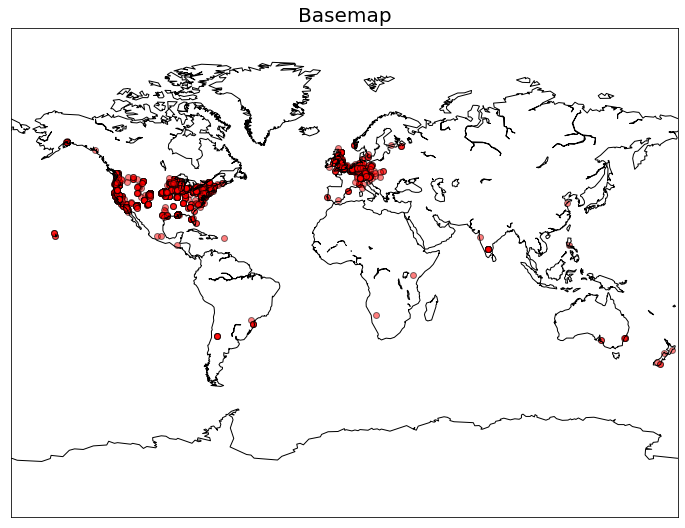

In [63]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12, 9))
m = Basemap(projection='mill',
           llcrnrlat = -90,
           urcrnrlat = 90,
           llcrnrlon = -180,
           urcrnrlon = 180,
           resolution = 'c')

m.drawcoastlines()


m.scatter(x, y, latlon=True, c='red', alpha=0.5, edgecolor='k')



plt.title('Basemap', fontsize=20)
plt.show

Check out seaborn: https://cmdlinetips.com/2019/01/how-to-make-heatmap-with-seaborn-in-python/

In [55]:
import seaborn as sns

#saving back a sql-statement into a pandas dataframe:

df = pd.read_sql_query("SELECT city, COUNT(DISTINCT(name_brewery)) as 'count_brewery' FROM mybeers_table GROUP BY city ORDER BY count_brewery DESC", conn)
print(df)

              city  count_brewery
0          Seattle             10
1             None             10
2         Portland              9
3          Bamberg              9
4        San Diego              7
..             ...            ...
642  Aix les Bains              1
643      Adamstown              1
644          Achel              1
645  Abita Springs              1
646       Abingdon              1

[647 rows x 2 columns]


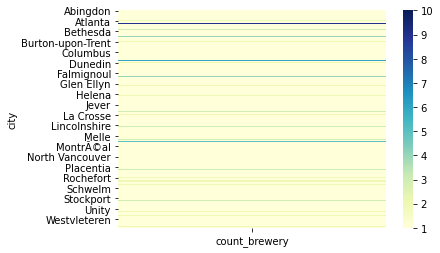

In [61]:
df1 = df[['city', 'count_brewery']]
heatmap1_data = pd.pivot_table(df1, values='count_brewery', index=['city'])

# sns.heatmap(df1, cmap="YlGnBu")
sns.heatmap(heatmap1_data, cmap="YlGnBu")

# heatmap1_data.head(n=5)
# plt.figure(figsize=(5, 90))
# sns.heatmap(heatmap1_data, cmap="BuGn")

# plt.figure(figsize=(25, 150))
# sns.heatmap(heatmap1_data, cmap="RdBu")

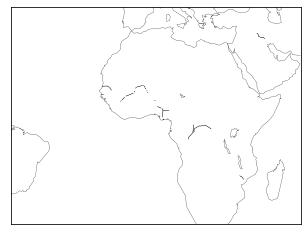

In [65]:
from mpl_toolkits.basemap import Basemap
from matplotlib import cm as cmap
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# input data
# coords = np.loadtxt("testdata.csv", delimiter=',', skiprows=1, usecols=(2, 3))
# lon = coords[:,0]
# lat = coords[:,1]

a = (join_all['latitude'].dropna(how=all)).values.tolist()
b = (join_all['longitude'].dropna(how=all)).values.tolist()

# x = join_all['longitude'].values.tolist()

# x = x.droppna(how=all)
# y = y.droppna(how=all)

# create map
m = Basemap(width=12000000, height=9000000, projection='lcc',
            resolution='c', lat_0=6, lon_0=4.)
m.drawcoastlines(linewidth=0.25)

# # # create heatmap
# heatmap, xedges, yedges = np.histogram2d(y, x, bins=20)

# # # plot map
# plt.clf()
# m.imshow(heatmap.T, interpolation='none', cmap=cmap.jet)
# plt.show()